# Overlord AI
For information about this project, see [this README.md](../doc/README.md)


## TODO:

* [x] notebook source list
* [x] notebook downloads
* [ ] dataset downloads
* [ ] dataset processing
* [ ] model training

# CODE STARTS HERE

First we import all the libraries and whatnot

# imports


In [1]:
import requests
import pandas as pd
import numpy as np
import pylab as pyl
import matplotlib.pyplot as plt
import os
import re

%matplotlib inline

# definitions

I added an optional download for the used workbooks so you have them saved locally for when you want to use them. When set to True, all the models will be downloaded to ../data/.models/

In [2]:
useScrapedCsv = False
downloadWorkbooks = False
downloadDatasets = False

maxTagLength = 40
maxDataSourceLinkLength = 200

# reading data


## data gathering

In [3]:
df = pd.DataFrame([], columns=[
                  'index', 'link', 'requeststatus', 'content'])
sourcelist = pd.read_csv("../data/models/sources.csv")                  
index = 0
    
if(useScrapedCsv):
    df = pd.read_csv("kaggleScrape.csv", index_col=0)
else:
    # print(sourcelist)
    for item in sourcelist['Sources']:  # loop through sources
        print(index)
        r = requests.get(item)  # get the html data
        print("response: %s"%r.status_code)
    # add data to the df
        new_row = [index, item, r.status_code, r.text]
        df.loc[index] = new_row
        index += 1
if (downloadWorkbooks and not useScrapedCsv):
    for item in sourcelist['Sources']:
        # download the workbooks
        print(index)
        kagglelink = item.replace('https://www.kaggle.com/code/', "")
        dirname = kagglelink.split("/")[1]
        command = "kaggle k pull " + kagglelink + " -p ../data/.models/"+dirname+"/src/"
        print(command)
        #os.system('%s' % command)
        index += 1
print("data gathered")

0
response: 200
1
response: 200
2
response: 200
3
response: 200
4
response: 200
5
response: 200
6
response: 200
7
response: 200
8
response: 200
9
response: 200
10
response: 200
11
response: 200
12
response: 200
13
response: 200
14
response: 200
15
response: 200
16
response: 200
17
response: 200
18
response: 200
19
response: 200
20
response: 200
21
response: 200
22
response: 200
23
response: 200
24
response: 200
25
response: 200
26
response: 200
27
response: 200
28
response: 200
29
response: 200
30
response: 200
31
response: 200
32
response: 200
33
response: 200
34
response: 200
35
response: 200
36
response: 200
37
response: 200
38
response: 200
39
response: 200
40
response: 200
41
response: 200
42
response: 200
43
response: 200
44
response: 200
45
response: 200
46
response: 200
47
response: 200
48
response: 200
49
response: 200
50
response: 200
51
response: 200
52
response: 200
53
response: 200
54
response: 200
55
response: 200
56
response: 200
57
response: 200
58
response: 200
59
resp

### get dataset link

In [4]:

# from logging import exception

# #TODO YEET ALL THIS IN DATASET GATHERING

# def isNaN(string):
#         return string != string
# successful =0
# failed = 0
# if (downloadDatasets):
#         for index,  row in df.iterrows():
#                 print(index)
#                 kagglelink = str(df.loc[df['index'] == index, 'link'].replace('https://www.kaggle.com/code/', ""))
#                 #print("ASDF %s"%kagglelink)
#                 #print (type(datalink))
#                 dirname = kagglelink.split("/")[1]
#                 # download the dataset
#                 try:
#                         for sourceCount in range(3):
#                                 datalink = df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount]
#                                 #print(type(datalink))
#                                 #print(datalink)
#                                 if(type(datalink[0])!=float):
#                                         #kagglelink = str(df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount].replace('https://www.kaggle.com/code/', ""))
#                                         #print("AAAAAAAAAAAAAAAAAAa")
#                                         #print(type(datalink[0]))
#                                         print(datalink[0])
#                                         command = "kaggle datasets download -d " + str(datalink[0]) + " -p ../data/.models/"+str(dirname)+"input/"
#                                         print(command)
#                                         #os.system('%s' % command)
#                                         successful+=1
#                 except:
#                         #print(type(datalink[0]))
#                         #print(datalink[0])
#                         print(exception)
#                         failed +=1   
#         print("________________________________________")
#         print("%d dataset(s) downloaded successfully"%successful)
#         print("%d dataset(s) failed to download"%failed)
#         print("%d total dataset(s)"%(successful+failed))
# else:
#         print("skipped dataset downloading")                     

## transform data

### get dataset

In [5]:
def getDataSets(index,row):
    #print(index)
    # print(row['content'])
    iter =0
    index2=0
    df.loc[df['index'] == index, 'dataSourceCount']=0
    dataSourceUrl = re.findall("\"dataSourceUrl\"\:.{,%d}\"thumbnailUrl\""%maxDataSourceLinkLength, row['content']) # TODO make other stuff like this (tags)
    if(dataSourceUrl):
        #print("Dataset Url: %s"%dataSourceUrl)
        for source in dataSourceUrl:
            sourceClean = re.split(':|,|"', source)[4]
            df.loc[df['index'] == index, 'dataSourceUrl%d'%index2] = str(sourceClean)
            print("Dataset Url: %s"%sourceClean)
            if(downloadDatasets and not useScrapedCsv):
                sourceSplit = sourceClean.split('/', maxsplit=2)
                if(sourceSplit[1]=='datasets'):
                    command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                    print(command)
                    #os.system('%s' % command)
                if(sourceSplit[1]=='competitions'):
                    command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                    print(command)
                    #os.system('%s' % command)
                if(sourceSplit[1]=='kaggle'):
                    print("no dataset")
                #print(sourceSplit)
                # command = "kaggle datasets download -d " + sourceClean + " -p ../data/.models/"+str(dirname)+"input/"
                # print(command)
                #os.system('%s' % command)
            index2 +=1
        df.loc[df['index'] == index, 'dataSourceCount']=index2
    if(downloadDatasets and not useScrapedCsv):
        print("Finished downloading datasets")
    else:
        print("Skipped downloading datasets")

### get execution time

In [6]:
# html parsing
# grep -ioe "runtimeseconds\"\:[0-9]*\.[0-9]*" # grep to extract the run time form html
def getExecTime(index,row):

    # print(index)
    # print(row['content'])
    runTime = float(re.split(":", re.findall(
        "\"runTimeSeconds\"\:[0-9]+\.[0-9]+", row['content'])[0])[1])
    print("runtime in seconds: %f"%runTime)
    df.loc[df['index'] == index, 'runTime'] = runTime


### get upvotes

In [7]:
# html parsing
# grep -ioe "runtimeseconds\"\:[0-9]*\.[0-9]*" # grep to extract the run time form html
def getUpvotes(index,row):
    # print(index)
    # print(row['content'])
    upvoteCount = int(re.split(":", re.findall(
        "\"upvoteCount\"\:[0-9]+", row['content'])[0])[1])
    print("upvotes: %d"%upvoteCount)
    df.loc[df['index'] == index, 'upvoteCount'] = upvoteCount


### get tags

In [8]:
def getTags(index, row):
# for index, row in df.iterrows():
    # print(index)
    # "tags"":[]
    tags = re.findall("\"tags\"\:\[.+\"\}\]\,\"upvoteCount\"", row['content'])
    # print(tags)
    tagsFormatted = ""
    # this is here so it's before all the hot encoded stuff
    
    df.loc[df['index'] == index, 'tagCount'] = 0
    df.loc[df['index'] == index, 'tags'] = tagsFormatted
    
    if (tags):
        for iter in range(maxTagLength):
            temp = re.findall("\"slug\"\:\".{%d}\"\,\"url" % iter, tags[0])

            if (temp):
                temp = re.split(':|,|"', temp[0])[4]
                # print(temp)
                # hot encoded tags
                df.loc[df['index'] == index, "%s_t"%temp] = 1
                # fill the empty values
                #df[temp] = df[temp].fillna(0)
                tagsFormatted = tagsFormatted + temp + " "
        df.loc[df['index'] == index, 'tagCount'] = tagsFormatted.count(' ') 
    print("tag count: %d"%tagsFormatted.count(' '))
    print("tags: %s"%tagsFormatted)  # human readable, space delimited list of the tags
    df.loc[df['index'] == index, 'tags'] = tagsFormatted


In [9]:

for index, row in df.iterrows():
    print(index)
    getExecTime(index,row)
    getUpvotes(index,row)
    getDataSets(index,row)
for index, row in df.iterrows():
    print(index)
    getTags(index,row) # must always be last and grouped so can't be run at the same time as the other gets as getDataSets can split up the tag columns

# df.to_csv('kaggleScrape.csv', index=True)

# for index, row in df.iterrows():
#     df.loc[df['index'] == index, 'content'] = ""

0
runtime in seconds: 861.112981
upvotes: 4203
Dataset Url: /datasets/mlg-ulb/creditcardfraud
Skipped downloading datasets
1
runtime in seconds: 1206.104310
upvotes: 3346
Dataset Url: /competitions/home-credit-default-risk
Skipped downloading datasets
2
runtime in seconds: 20.786203
upvotes: 2691
Dataset Url: /competitions/titanic
Skipped downloading datasets
3
runtime in seconds: 386.320938
upvotes: 2501
Dataset Url: /competitions/titanic
Skipped downloading datasets
4
runtime in seconds: 22.583234
upvotes: 2306
Dataset Url: /datasets/uciml/biomechanical-features-of-orthopedic-patients
Skipped downloading datasets
5
runtime in seconds: 48.534224
upvotes: 2262
Dataset Url: /datasets/ardamavi/sign-language-digits-dataset
Skipped downloading datasets
6
runtime in seconds: 49.849152
upvotes: 1658
Dataset Url: /datasets/uciml/breast-cancer-wisconsin-data
Skipped downloading datasets
7
runtime in seconds: 2790.507509
upvotes: 1251
Dataset Url: /datasets/authman/pickled-glove840b300d-for-10s

In [10]:
df2=0
df2 = pd.DataFrame([], columns=[
                  'index', 'link', 'requeststatus', 'notebookContent'])
if(useScrapedCsv):
    df2=pd.read_csv("notebookScrape.csv",index_col=0)
else:
    for index, row in df.iterrows():
        print(index)
        # print(row['content'])
        noteBookLinkRaw=re.findall(
            "\"renderedOutputUrl\"\:\"https\:\/\/www\.kaggleusercontent\.com\/kf\/\d+\/.+\/__result[sx]__\.html\?sharingControls=true\"\,\"", row['content'])
        try:
            noteBookLink = re.split(":",noteBookLinkRaw[0] , maxsplit=1)[1]
            noteBookLink = noteBookLink.strip(' " " ')
            print("Notebook link: %s" % noteBookLink)
            # df.loc[df['index'] == index, 'noteBookLink'] = noteBookLink
            r = requests.get(noteBookLink)
            new_row = [index, noteBookLink, r.status_code, r.text]
            df2.loc[index] = new_row
        except:
            print("No notebook link found, double check if this is a notebook or something else!")
            r=0
        


0
Notebook link: https://www.kaggleusercontent.com/kf/16695845/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Kf2jmMmr8uGrE8IeF5iduw.-froRVXmUyOPMNMjWZtTuHrrresTsFqA2hkv6PhTSSgLWAbjAdp3rzqnqekeXQer9Ldq0eR2yQKYt7iPYki-5sjqZXyBnUL8EpfBnGfCcvk8XdgAqSEmJMjoQz5nsurKOS8Pxk4bw1zpJG8iyB-Ji9pUpoB8yE49zSbQ2ClEDgIOITBwOfxz27Bpy0hLx2VGFgEWXukDKCjtcFHrzhD9xEcGs2k66rVQvMf-50dcyt4aevjFnJD-Du6bctiAjLfsbOnX_fvAkcQ4hVknFG2NxG1d7vquKw4kKP2phCG1dKrx_g9bt34f8FaWNikkSRpSGsV5jG23WJDK6xyxIoa6qEClj1xdWbZUjvpQBA_ZVQiPpyGnHTexkBml8dYv3Qr2d_b63_5JHqMThvPiNu4X3j9iD3FQtpGyIydIAQFbiD_qd-zDo4ATQTSGm1lb4rLkEjYFBesVno2cQcYur0NE1nxnRENB5VUgp_7ZEq-WA76oybmWvC8LrFoNQCDYTofQ9KeRmXodbfqNIzIgn3jrhL13RJYQmzzbOR7dk_EEFtEIM_xFo3qKnp6xPL0Wd1C5sg08-sYn9B6BldCoiXchJBZz3RYaXgwk8riTgVODCKRW25dysGwHwnd3osLXJcB4bYiynVSMOe-HKZmOvkZ1l3r2G51_KnRMolrzFjPj7Me3QmpYIglDo1zqw98hlMmD.xRKrRrc0t-_ftBak9zf4sQ/__results__.html?sharingControls=true",
1
Notebook link: https://www.kaggleusercontent.com/kf/5301226/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0J

In [11]:
#process the notebook data
# for index, row in df2.iterrows():
def getImports(index, row):
    # print(index)
    # "tags"":[]
    imports = re.findall("\<span class\=\"kn\"\>import\<\/span\> \<span class\=\"nn\"\>[a-zA-Z0-9\-]+\<\/span\>", row['notebookContent'])
    # print(tags)
    importsFormatted = ""
    # this is here so it's before all the hot encoded stuff
    df.loc[df['index'] == index, 'importCount'] = 0
    df.loc[df['index'] == index, 'imports'] = importsFormatted

    if (imports):
        print(index)
        for import_ in imports:
            importClean=re.sub(r"<span class=\"kn\">import</span> <span class=\"nn\">", "", import_)
            importClean=re.sub(r"</span>", "", importClean)
            #print(importClean)
            if not importsFormatted.__contains__(importClean):
                importsFormatted = importsFormatted + importClean + " "
                df.loc[df['index'] == index, "%s_i"%importClean] = 1
                #df[importsFormatted] = df[importsFormatted].fillna(0)
    df.loc[df['index'] == index, 'imports'] = importsFormatted
    df.loc[df['index'] == index, 'importCount'] = importsFormatted.count(' ') 
    print("Import count: %d"%importsFormatted.count(' '))
    print("Imports: %s"%importsFormatted)

# del df2 # clear the memory

In [12]:
for index, row in df2.iterrows():
    getImports(index,row)

0
Import count: 9
Imports: numpy pandas tensorflow seaborn time collections warnings keras itertools 
1
Import count: 7
Imports: numpy pandas os warnings seaborn lightgbm gc 
2
Import count: 3
Imports: pandas numpy seaborn 
3
Import count: 5
Imports: numpy pandas seaborn warnings xgboost 
4
Import count: 4
Imports: numpy pandas seaborn warnings 
5
Import count: 3
Imports: numpy pandas warnings 
6
Import count: 5
Imports: numpy pandas seaborn time warnings 
7
Import count: 9
Imports: gc re string operator numpy pandas seaborn tokenization tensorflow 
8
Import count: 9
Imports: gc os logging datetime warnings numpy pandas seaborn lightgbm 
Import count: 0
Imports: 
10
Import count: 15
Imports: numpy pandas os lightgbm xgboost time datetime gc seaborn warnings eli5 shap json altair networkx 
11
Import count: 6
Imports: pandas numpy matplotlib seaborn datetime itertools 
12
Import count: 4
Imports: numpy pandas random os 
13
Import count: 5
Imports: tensorflow pandas seaborn numpy time 
14

## export data

In [13]:
df.to_csv('kaggleScrape.csv', index=True)
df2.to_csv('notebookScrape.csv', index=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Columns: 146 entries, index to spacy_i
dtypes: float64(127), int64(2), object(17)
memory usage: 114.8+ KB


In [15]:
df.describe()

,index,requeststatus,runTime,upvoteCount,dataSourceCount,tagCount,finance_t,classification_t,data-visualization_t,dimensionality-reduction_t,...,IPython_i,wave_i,cufflinks_i,struct_i,sklearn_i,glob_i,scikitplot_i,fastai_i,tokenizers_i,spacy_i
count,100.000000,100.0,100.000000,100.00000,100.000000,100.000000,4.0,99.0,28.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
mean,49.500000,200.0,3063.192078,517.76000,1.590000,4.120000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,29.011492,0.0,6316.369889,678.06491,1.621167,1.622319,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,0.000000,200.0,4.665378,16.00000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,24.750000,200.0,72.613406,211.00000,1.000000,3.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,49.500000,200.0,758.978101,277.00000,1.000000,4.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,74.250000,200.0,2294.458634,452.75000,2.000000,5.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,99.000000,200.0,31860.469529,4203.00000,13.000000,10.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
df.head()

,index,link,requeststatus,content,runTime,upvoteCount,dataSourceCount,dataSourceUrl0,dataSourceUrl1,dataSourceUrl2,...,IPython_i,wave_i,cufflinks_i,struct_i,sklearn_i,glob_i,scikitplot_i,fastai_i,tokenizers_i,spacy_i
0,0,https://www.kaggle.com/code/janiobachmann/cred...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",861.112981,4203.0,1.0,/datasets/mlg-ulb/creditcardfraud,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.kaggle.com/code/willkoehrsen/start...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",1206.104310,3346.0,1.0,/competitions/home-credit-default-risk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.kaggle.com/code/yassineghouzam/tit...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",20.786203,2691.0,1.0,/competitions/titanic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.kaggle.com/code/ash316/eda-to-pred...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",386.320938,2501.0,1.0,/competitions/titanic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.kaggle.com/code/kanncaa1/machine-l...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",22.583234,2306.0,1.0,/datasets/uciml/biomechanical-features-of-orth...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


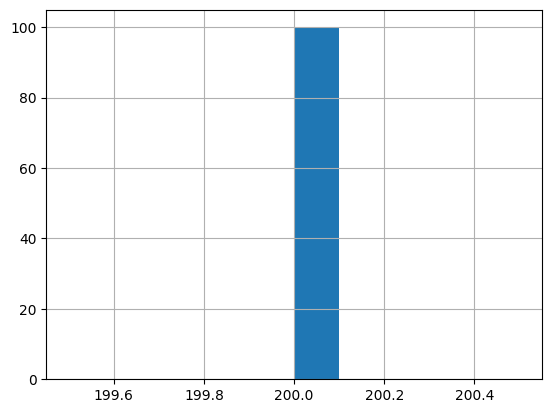

In [17]:
df['requeststatus'].hist()
pyl.show()

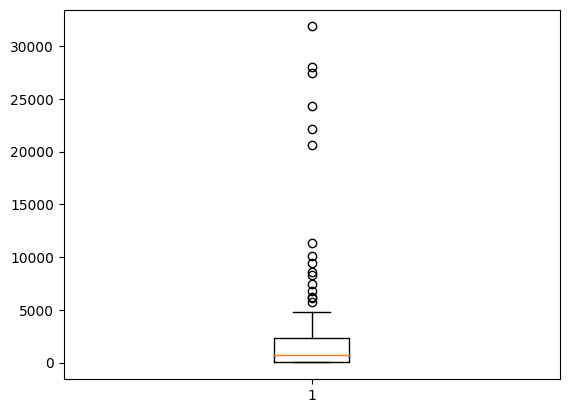

In [18]:
plt.boxplot(df['runTime'])
plt.show()

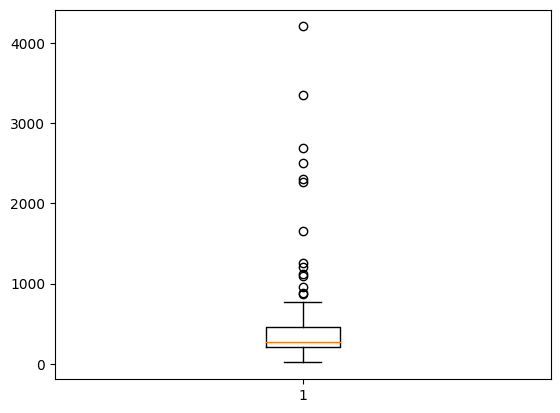

In [19]:
plt.boxplot(df['upvoteCount'])
plt.show()

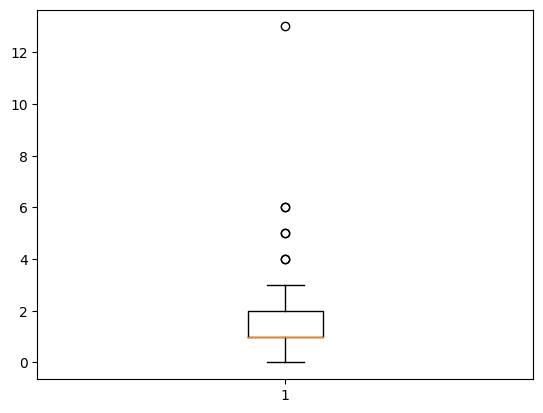

In [20]:
plt.boxplot(df['dataSourceCount'])
plt.show()

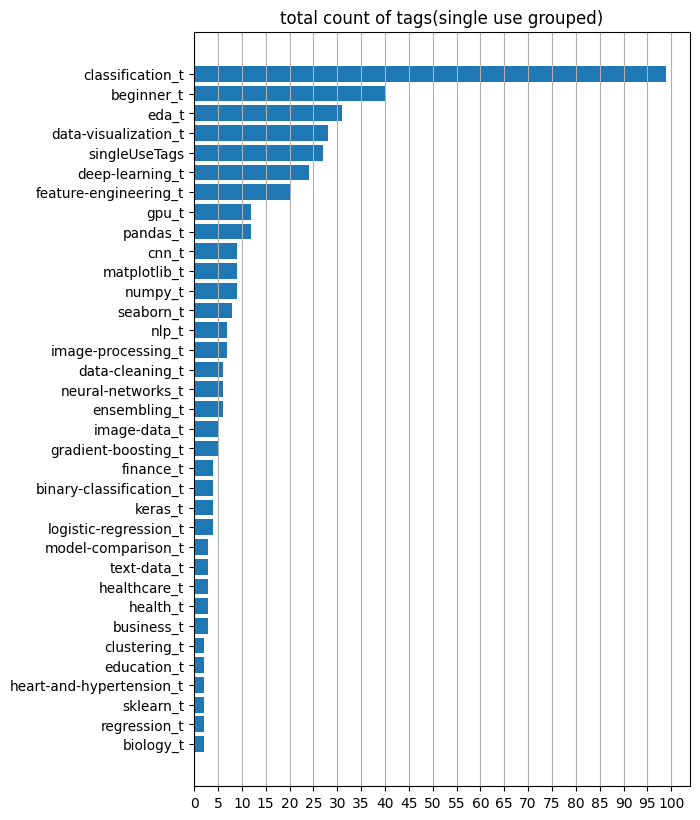

In [21]:
dftemp = pd.DataFrame([[0,"singleUseTags"]], columns=[
                  'height', 'bars'])
inLoop = False
index =1
singleUseTags=0
for column in df:
    #print(column)
    if(column=='imports'):
        inLoop=False
    if(inLoop):
        if(df[column].value_counts()[1]<2):
            singleUseTags+= df[column].value_counts()[1]
            dftemp.loc[0,"height"] =singleUseTags
        else:
            dftemp.loc[index,"bars"] = str(column)
            dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='tags'):
        inLoop = True

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of tags(single use grouped)')
plt.show() 
#del dftemp # clear the memory

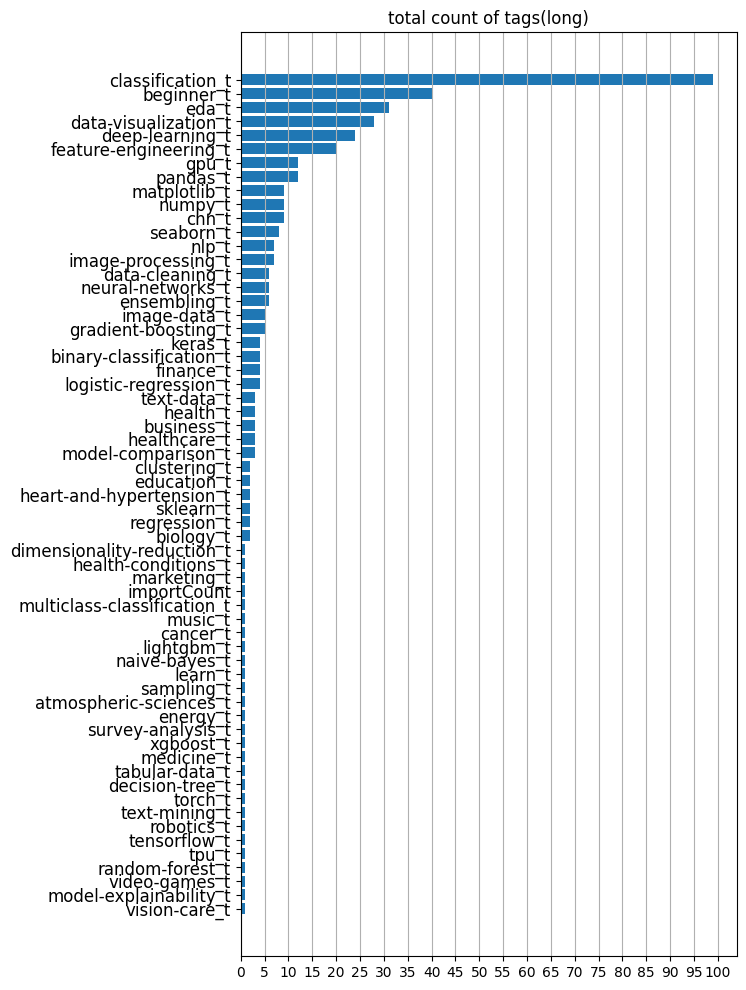

In [22]:
dftemp = pd.DataFrame([], columns=['height', 'bars'])
inLoop = False
index =0
singleUseTags=0
for column in df:
    #print(column)
    if(column=='imports'):
        inLoop=False
    if(inLoop):
        
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='tags'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of tags(long)')
plt.show() 

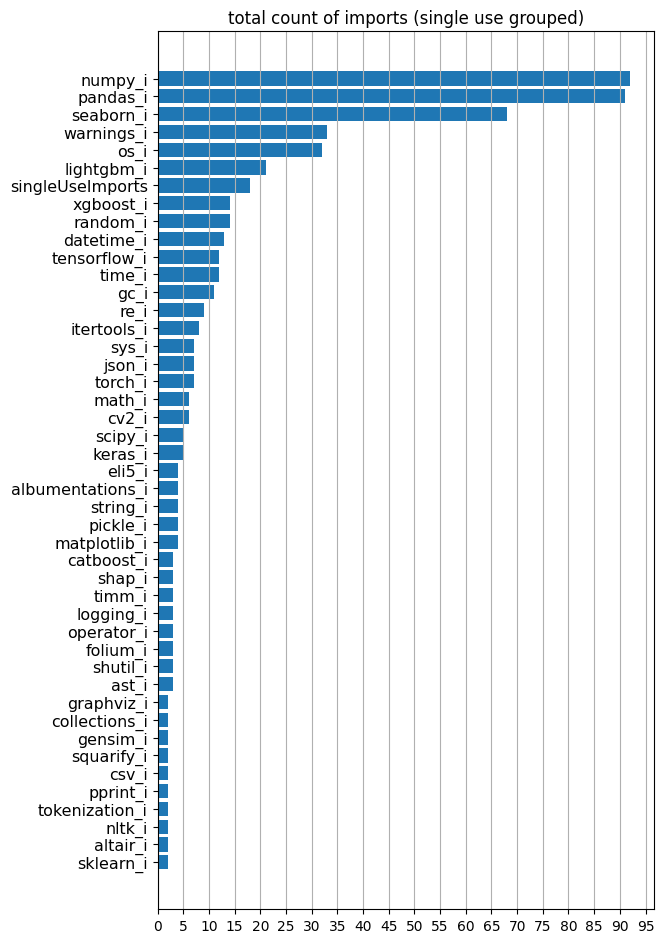

In [23]:
dftemp = pd.DataFrame([[0,"singleUseImports"]], columns=[
                  'height', 'bars'])
inLoop = False
index =1
singleUseImports=0
for column in df:
    #print(column)
    # if(column=='imports'):
    #     inLoop=False
    if(inLoop):
        if(df[column].value_counts()[1]<2):
            singleUseImports+= df[column].value_counts()[1]
            dftemp.loc[0,"height"] =singleUseImports
        else:
            dftemp.loc[index,"bars"] = str(column)
            dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='imports'):
        inLoop = True

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of imports (single use grouped)')
plt.show() 
#del dftemp # clear the memory

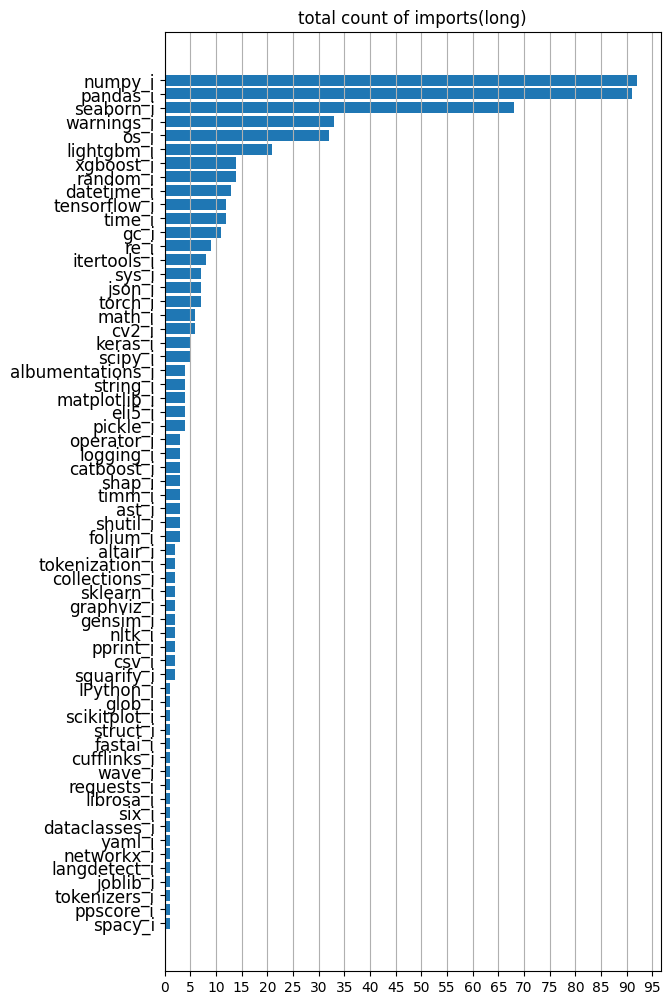

In [24]:
dftemp = pd.DataFrame([], columns=['height', 'bars'])
inLoop = False
index =0
for column in df:
    #print(column)
    # if(column=='imports'):
    #     inLoop=False
    if(inLoop):
        
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='imports'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of imports(long)')
plt.show() 

In [25]:
# del df
# del df2
# del dftemp

#TODO
data scraping
- dataset size
- df info/describe